# Data Plotting

In this notebook we are going to plot the data about hoaxes and fact-checking obtained from [Hoaxy](https://hoaxy.iuni.iu.edu) and see what they look like.

## Imports

The Python module needed to run this notebook. Just run this cell once.

In [11]:
%matplotlib inline

import numpy
import pandas
import os
import json

import matplotlib.pyplot as plt

from contextlib import closing

from plotting import plotall, plotonewithurls

## Reading the data

_**IMPORTANT**: Adjust the paths below to those of your own files._

Data are stored in two separate files. An HDF5 [store file](https://pandas.pydata.org/pandas-docs/version/0.22/io.html#hdf5-pytables) that includes a dataframe for each story, and a dictionary with the URLs of 
both `fake` and `fact` articles. 
Note that to be able to read the HDF file you will need PyTables to be installed alongside with Pandas.

In [2]:
hdf_store_path = '../../data/data.hdf'
urls_json_path = '../../data/data.json'

Evaluate this cell to read the data. `data` is a dictionary mapping `story_id` to each data frame. `urls` is a dictionary of lists with two entries: one called `"fact"` and one called `"fake"`. Each list includes the full URLs of the articles of each story. For each ID the corresponding columns in the data frame are named with the domain of the website and a progressive number in case of multiple stories from the same website (e.g. `infowars.com`, `infowars.com1`, etc.).

In [3]:
store = pandas.HDFStore(hdf_store_path)
with closing(store):
    data = dict((int(k.split('_')[1]), store[k]) for k in store)

with closing(open(urls_json_path)) as f:
    urls = json.load(f)

Each has a number of columns equal to the articles in the story. Columns are grouped by type (`fake` or `fact`). For example, let's get the first story in the data set:

In [4]:
k0 = sorted(data.keys())[0]
print(k0)

3


In [5]:
df = data[k0]
df.head()

,fact,fake
,politifact.com,breitbart.com
timestamp,,
2017-03-03 08:00:00,0.0,226.0
2017-03-03 09:00:00,0.0,229.0
2017-03-03 10:00:00,0.0,231.0
2017-03-03 11:00:00,0.0,234.0
2017-03-03 12:00:00,0.0,238.0


This frame has exactly two columns, since there is only one article per type, one from Politifact and one To know which articles are they, look into the `urls` dict. (Note that keys are strings here, due to JSON allowing only strings as keys.)

In [6]:
urls[str(k0)]

{'fact': ['politifact.com/truth-o-meter/article/2017/mar/06/did-donald-trump-invent-claim-barack-obama-tapped-/'],
 'fake': ['breitbart.com/big-government/2017/03/03/mark-levin-obama-used-police-state-tactics-undermine-trump/']}

## Plotting the data

We can aggregate all articles by group and plot the data for each story. Since all data frames will have exactly the same columns, we can simply concatenate them all together into a single frame indexed by story ID.

In [7]:
df = pandas.concat(dict((k, df.sum(axis=1, level=0)) for k, df in data.items()), names=['story_id'])

Now the data frame has a hierarchical index, with the first level being the ID of the story, and the second level the timestamp.

In [8]:
df.head()

fact   fake
story_id timestamp                       
3        2017-03-03 08:00:00   0.0  226.0
         2017-03-03 09:00:00   0.0  229.0
         2017-03-03 10:00:00   0.0  231.0
         2017-03-03 11:00:00   0.0  234.0
         2017-03-03 12:00:00   0.0  238.0

Let's create a list with the IDs of the stories

In [9]:
keys = sorted(data.keys())

### All stories together, fake vs fact

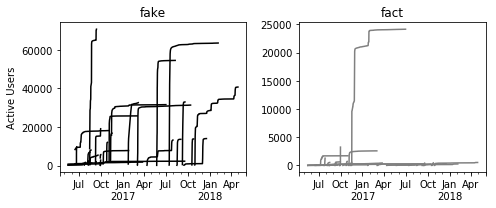

In [12]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))
for k in keys:
    df.loc[k]['fake'].plot(ax=axs[0], color='k', legend=False)
    df.loc[k]['fact'].plot(ax=axs[1], color='gray', legend=False)

axs[0].set_xlabel('')
axs[1].set_xlabel('')
axs[0].set_ylabel('Active Users')

axs[0].set_title("fake")
axs[1].set_title("fact")
plt.tight_layout()

### Each story individually, fake and fact

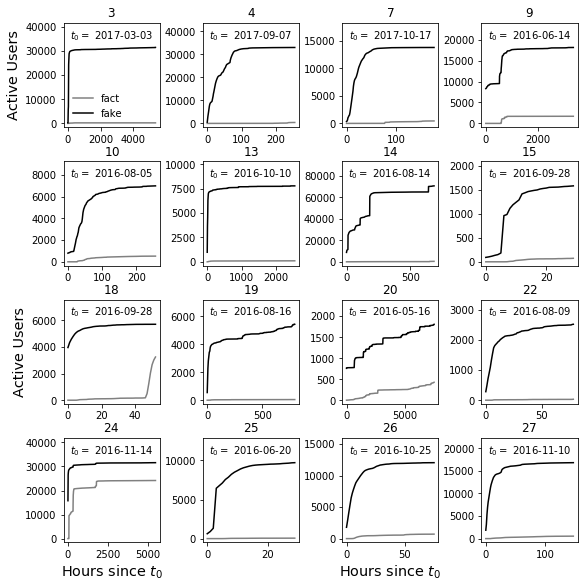

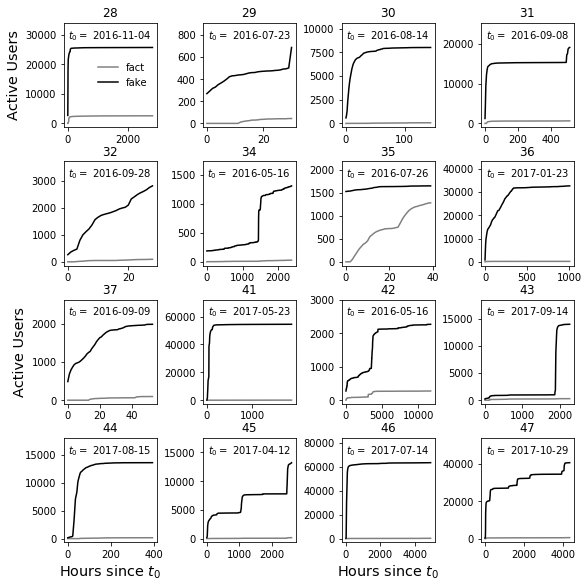

In [13]:
nrows = 4
ncols = 4
figsize = (8, 8)

plotall(df, nrows, ncols, figsize, color=['gray', 'k'])

### Plotting one story with multiple URLs, each URL separate, plus the total tweets per group of URLs

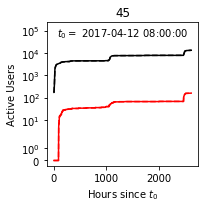

In [15]:
k = 45
plt.figure(figsize=(3, 3))
plotonewithurls(data[k], k)